<a href="https://colab.research.google.com/github/Farjana-Yesmin/FarjanaYesmin/blob/main/AI_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.chat.util import Chat, reflections
import random

# For data preprocessing and chatbot implementation
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import pandas as pd

# Load the dengue-related datasets with updated Google Drive links
dgs_1 = pd.read_csv('https://drive.google.com/uc?export=download&id=1MtvrLNrxZRnqEDgeMbWTKcVzHdgUxzah')
dgs_2 = pd.read_csv('https://drive.google.com/uc?export=download&id=1UpjwIZl6fdbLCETBhIN0qC4lPmo5l2mP')
dgs_3 = pd.read_csv('https://drive.google.com/uc?export=download&id=1UpjwIZl6fdbLCETBhIN0qC4lPmo5l2mP')
dgs_4 = pd.read_csv('https://drive.google.com/uc?export=download&id=154VMPrzPzuBXnwUUWoN4oqKCCL-1ihMl')
dgs_5 = pd.read_csv('https://drive.google.com/uc?export=download&id=1f_DLUUQxemllttJVfnDvH4wXYendM200')
dgs_6 = pd.read_csv('https://drive.google.com/uc?export=download&id=1pTEd4XDxrIVGCpGlBsOYw0TIWdxuehaM')

# Load additional datasets with corrected names
dengue_dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1MebTZTAmRYaak22C19lo7joN-GNVXU-_')
dengue_climate_bangladesh = pd.read_csv('https://drive.google.com/uc?export=download&id=1j1p4L1QDrM9jQWatkDxkpEYLYZ_i7nrM')

# Preview the first dataset
dgs_1.head()


,Age Group,Male,Female,Total
0,0-5,9,10,19
1,06-10,7,10,17
2,11-15,6,2,8
3,16-20,10,7,17
4,21-25,15,15,30


In [6]:
# Check for missing values in the datasets
print(dgs_1.isnull().sum())
print(dgs_2.isnull().sum())

# Handle missing data if necessary
dgs_1.fillna(method='ffill', inplace=True)
dgs_2.fillna(method='ffill', inplace=True)


Age Group    0
Male         0
Female       0
Total        0
dtype: int64
Age Group    1
Male         1
Female       1
Total        1
dtype: int64


<ipython-input-6-247a9e615fc0>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dgs_1.fillna(method='ffill', inplace=True)
<ipython-input-6-247a9e615fc0>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dgs_2.fillna(method='ffill', inplace=True)


In [7]:
# Use forward fill for missing values in both datasets (updated method)
dgs_1.ffill(inplace=True)
dgs_2.ffill(inplace=True)

# Confirm the missing values have been handled
print(dgs_1.isnull().sum())
print(dgs_2.isnull().sum())


Age Group    0
Male         0
Female       0
Total        0
dtype: int64
Age Group    1
Male         1
Female       1
Total        1
dtype: int64


In [8]:
# Step 1: Feature Engineering
# Convert categorical features like 'Age Group' and 'Gender' into numerical form if needed

# For example, if 'Age Group' is categorical, you can use one-hot encoding or label encoding
dgs_1['Age Group'] = dgs_1['Age Group'].astype('category')
dgs_1['Age Group_encoded'] = dgs_1['Age Group'].cat.codes

# You may also want to create a "severity" column based on the 'Total' number of cases
# E.g., if Total > threshold, we mark it as severe, otherwise not
threshold = 20  # Set this based on your understanding of the data
dgs_1['Severity'] = dgs_1['Total'].apply(lambda x: 1 if x > threshold else 0)

# Preview the engineered features
print(dgs_1[['Age Group', 'Age Group_encoded', 'Total', 'Severity']].head())


  Age Group  Age Group_encoded  Total  Severity
0       0-5                  0     19         0
1     06-10                  1     17         0
2     11-15                  2      8         0
3     16-20                  3     17         0
4     21-25                  4     30         1


In [9]:
# Step 2: Data Preparation
from sklearn.model_selection import train_test_split

# Define the features and label
# Assuming 'Male', 'Female', and 'Age Group_encoded' are useful features for prediction
X = dgs_1[['Male', 'Female', 'Age Group_encoded']]
y = dgs_1['Severity']  # Label: whether the severity of cases is high or not

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (14, 3)
Testing data shape: (4, 3)


In [10]:
# Step 3: Model Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = clf.predict(X_test)

# Step 5: Evaluate the Model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Accuracy of the model: 1.00


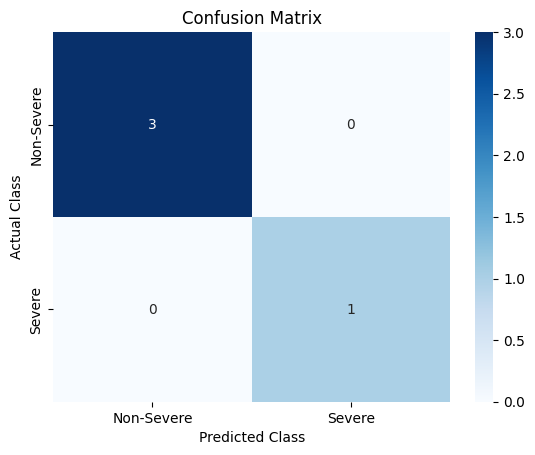

Classification Report:
              precision    recall  f1-score   support

  Non-Severe       1.00      1.00      1.00         3
      Severe       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [11]:
# Step 4: Make Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# 2. Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix to visualize performance
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Severe', 'Severe'], yticklabels=['Non-Severe', 'Severe'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# 3. Classification Report
from sklearn.metrics import classification_report

# Print the classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Severe', 'Severe']))


In [12]:
# Example of a simple chatbot-like function
def dengue_symptom_checker(male, female, age_group):
    # Convert age_group to encoded value (same as during training)
    age_group_encoded = dgs_1[dgs_1['Age Group'] == age_group].iloc[0]['Age Group_encoded']

    # Create an input array for the model
    input_data = [[male, female, age_group_encoded]]

    # Use the trained model to predict severity
    prediction = clf.predict(input_data)

    if prediction == 1:
        return "You may have a severe case of dengue. Please consult a healthcare provider immediately."
    else:
        return "Based on the symptoms, you are less likely to have a severe case, but stay alert."

# Example usage of the chatbot function
response = dengue_symptom_checker(male=1, female=0, age_group='21-25')
print(response)


Based on the symptoms, you are less likely to have a severe case, but stay alert.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the number of folds for cross-validation (e.g., 5-fold)
k = 5

# Use StratifiedKFold to preserve class proportions in each fold
skf = StratifiedKFold(n_splits=k)

# Perform cross-validation and compute accuracy for each fold
cross_val_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores for {k} folds: {cross_val_scores}')
print(f'Mean accuracy from cross-validation: {cross_val_scores.mean():.2f}')


Cross-validation scores for 5 folds: [1.         1.         1.         0.66666667 1.        ]
Mean accuracy from cross-validation: 0.93


In [14]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the new class distribution
print(f'Original class distribution:\n{y.value_counts()}')
print(f'Resampled class distribution:\n{pd.Series(y_resampled).value_counts()}')


Original class distribution:
Severity
0    12
1     6
Name: count, dtype: int64
Resampled class distribution:
Severity
0    12
1    12
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, None],  # For Decision Trees, Random Forest, etc.
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']  # If using Decision Trees
}

# Set up GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the resampled data
grid_search.fit(X_resampled, y_resampled)

# Best parameters from the grid search
print(f'Best parameters: {grid_search.best_params_}')

# Best model from the grid search
best_clf = grid_search.best_estimator_


Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [16]:
# Perform cross-validation on the best model from GridSearchCV
best_cross_val_scores = cross_val_score(best_clf, X_resampled, y_resampled, cv=skf, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores with tuned model: {best_cross_val_scores}')
print(f'Mean accuracy with tuned model: {best_cross_val_scores.mean():.2f}')


Cross-validation scores with tuned model: [1.  1.  0.8 1.  1. ]
Mean accuracy with tuned model: 0.96


Confusion Matrix:
[[12  0]
 [ 0  6]]


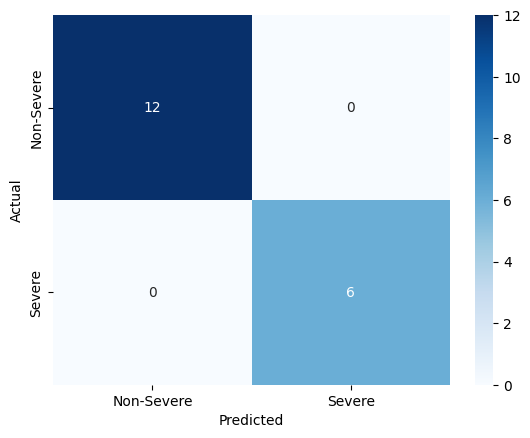

In [17]:
from sklearn.metrics import confusion_matrix

# Make predictions on the original test data
y_pred = best_clf.predict(X)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Optional: Visualize confusion matrix using seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Severe', 'Severe'], yticklabels=['Non-Severe', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importances:
Female               1.0
Male                 0.0
Age Group_encoded    0.0
dtype: float64


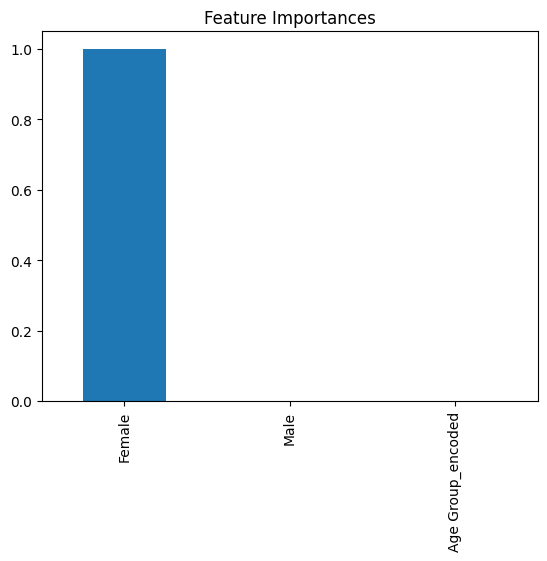

In [18]:
# For tree-based models, get feature importance
feature_importances = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print the most important features
print('Feature Importances:')
print(feature_importances)

# Plot feature importance
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()


In [19]:
# Combine Male and Female into one feature
dgs_1['Gender'] = dgs_1['Female']  # or use 'Male', it doesn't matter as they are inversely related
dgs_1.drop(['Male', 'Female'], axis=1, inplace=True)


In [20]:
from sklearn.preprocessing import StandardScaler

# Scale only numerical features (if using a model like Logistic Regression, SVM, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Use the scaled features for further modeling


Age Group                 category
Total                        int64
Age Group_encoded             int8
Severity                     int64
Gender                       int64
Age_Gender_Interaction       int64
dtype: object


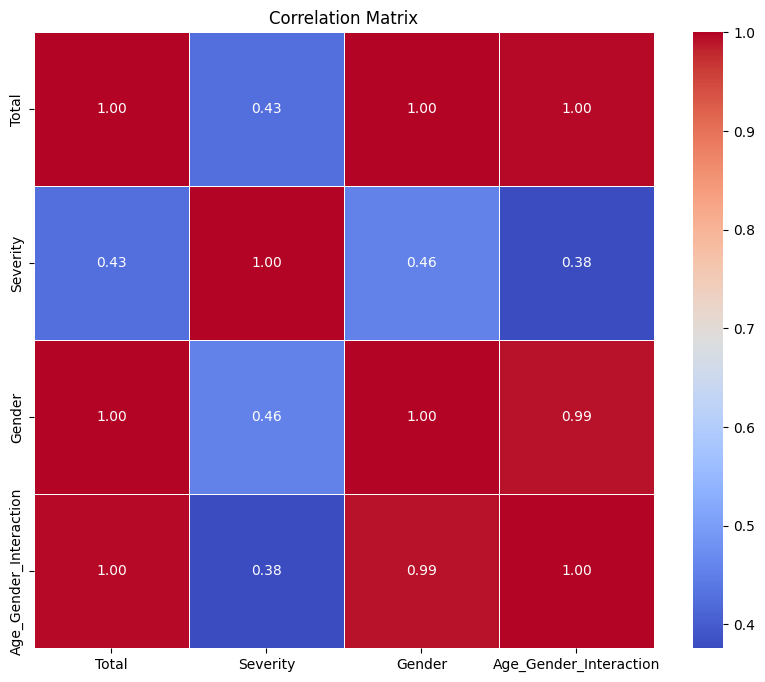

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, check the data types of the columns
print(dgs_1.dtypes)

# Select only numeric columns for the correlation matrix
dgs_1_numeric = dgs_1.select_dtypes(include=[float, int])  # Include only float and int types

# Compute the correlation matrix
corr_matrix = dgs_1_numeric.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



In [22]:
# Example: Create an interaction feature
dgs_1['Age_Gender_Interaction'] = dgs_1['Age Group_encoded'] * dgs_1['Gender']
